spreading:
simulate ,using the "NDlib" python library ,the diffusion models discussed during the course (SI,SIS,SIR,Threshol model) both on the crawled data on synthetic graphs (ER and VA).
Analyse the simulation  results varying boath model parameters  and initial conditions().
----------------------


In [1]:
!pip3 install ndlib 


     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 3.2MB 28.3MB/s 


In [2]:
import networkx as nx

In [3]:
from networkx import bipartite

In [4]:
import dynetx as dn

In [5]:
from bokeh.io import output_notebook, show

In [6]:
import ndlib.models.ModelConfig as mc

In [7]:
import ndlib.models.epidemics as ep

In [8]:
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

In [9]:
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

In [10]:
from ndlib.viz.bokeh.MultiPlot import MultiPlot

In [11]:
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

no display found. Using non-interactive Agg backend


In [12]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

no display found. Using non-interactive Agg backend


In [13]:
from ndlib.utils import multi_runs

In [14]:
import numpy as np

In [15]:
import matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
from plotly.offline import init_notebook_mode

In [18]:
%matplotlib inline

In [19]:
init_notebook_mode(connected=True)

---

In [20]:
#inja ma baraye rasm graph ma be sorate dasti megdar midim .

## 1 -  Network Definition

In [21]:
g=nx.erdos_renyi_graph(11110,226.9941/11110)#Shift+tab kenare e 1000  tozihatesh miad =>1000 tedade node ke bayad int bashe , 0.1 ke darsadi az on edge (ehtemale ijade labe)

In [22]:
g.number_of_nodes()

11110

In [23]:
g.number_of_edges()

1261260

In [24]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1261260
Average degree: 227.0495


In [25]:
#model haye sorate soal 

## 2 - Model Selection

In [26]:
model_SIR=ep.SIRModel(g)

In [27]:
model_SI=ep.SIModel(g)

In [28]:
model_SIS=ep.SISModel(g)

In [29]:
model_TSH=ep.ThresholdModel(g)

## 3 - Model Configuration

In [30]:
cfg=mc.Configuration()

In [31]:
cfg.add_model_parameter('beta', 0.001)#beta gama lamda ,.... parametrhaye on model balaee hast ke magidersh defult e 

In [32]:
cfg.add_model_parameter('gamma', 0.01)

In [33]:
cfg.add_model_parameter('lambda', 0.01)

In [34]:
cfg.add_model_parameter("percentage_infected", 0.01)

##  Setting node parameters

In [35]:
def tsh_fun():#tabe e ke miad treshold ro hesab mikone 
    threshold = 0.25
    
    for i in g.nodes():
        cfg.add_node_configuration("threshold", i, threshold)

In [36]:
def set_model_fun():#cfg miad ro model haee ke sakhtim status haso set mikone roye om model ha
    model_SIR.set_initial_status(cfg)
    model_SI.set_initial_status(cfg)
    model_SIS.set_initial_status(cfg)

In [37]:
#agar avali faal bashe dotaye badi diactive 
#avali : model bedone treshold 
#dovimi ba threshold

In [38]:
#set_model_fun()

In [39]:
tsh_fun()

In [40]:
set_model_fun()

## 4 - Simulation

In [41]:
iterations_SIR=model_SIR.iteration_bunch(200)#on modeli k sakhtim ro miad simulate mokone ba meghdare defult 200 => tedad tekrare on shabih sasi ma 200 tas 

100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


In [42]:
iterations_SI=model_SI.iteration_bunch(200)

100%|██████████| 200/200 [00:20<00:00,  9.56it/s]


In [43]:
iterations_SIS=model_SIS.iteration_bunch(200)

100%|██████████| 200/200 [00:26<00:00,  7.53it/s]


In [44]:
trends_SIR=model_SIR.build_trends(iterations_SIR)#motegayere tekrare on shabih sazimoneh bareye masir ro besazeh 

In [45]:
trends_SI=model_SI.build_trends(iterations_SI)

In [46]:
trends_SIS=model_SIS.build_trends(iterations_SIS)

## 5 - Visualize the results

In [47]:
viz_SIR = DiffusionTrend(model_SIR, trends_SIR)

In [48]:
viz_SI = DiffusionTrend(model_SI, trends_SI)

In [49]:
viz_SIS = DiffusionTrend(model_SIS, trends_SIS)

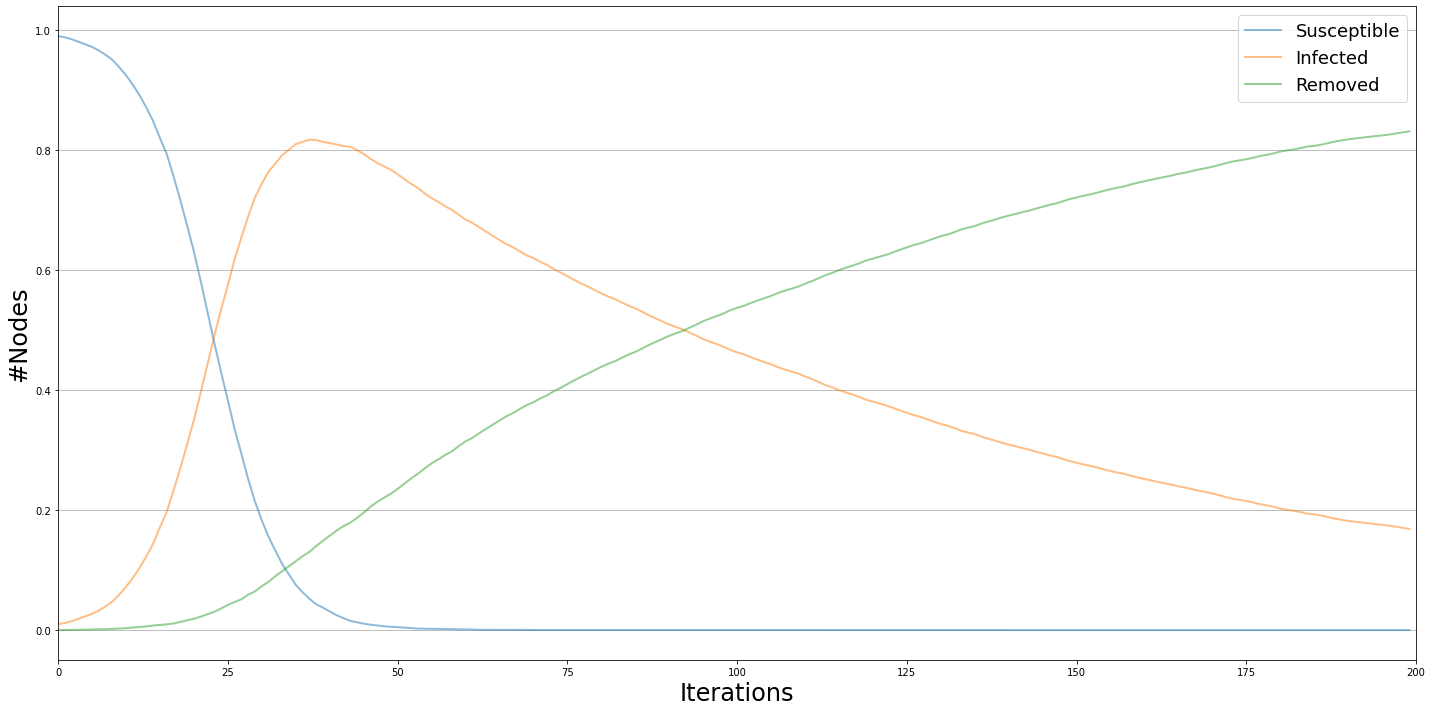

In [50]:
viz_SIR.plot()

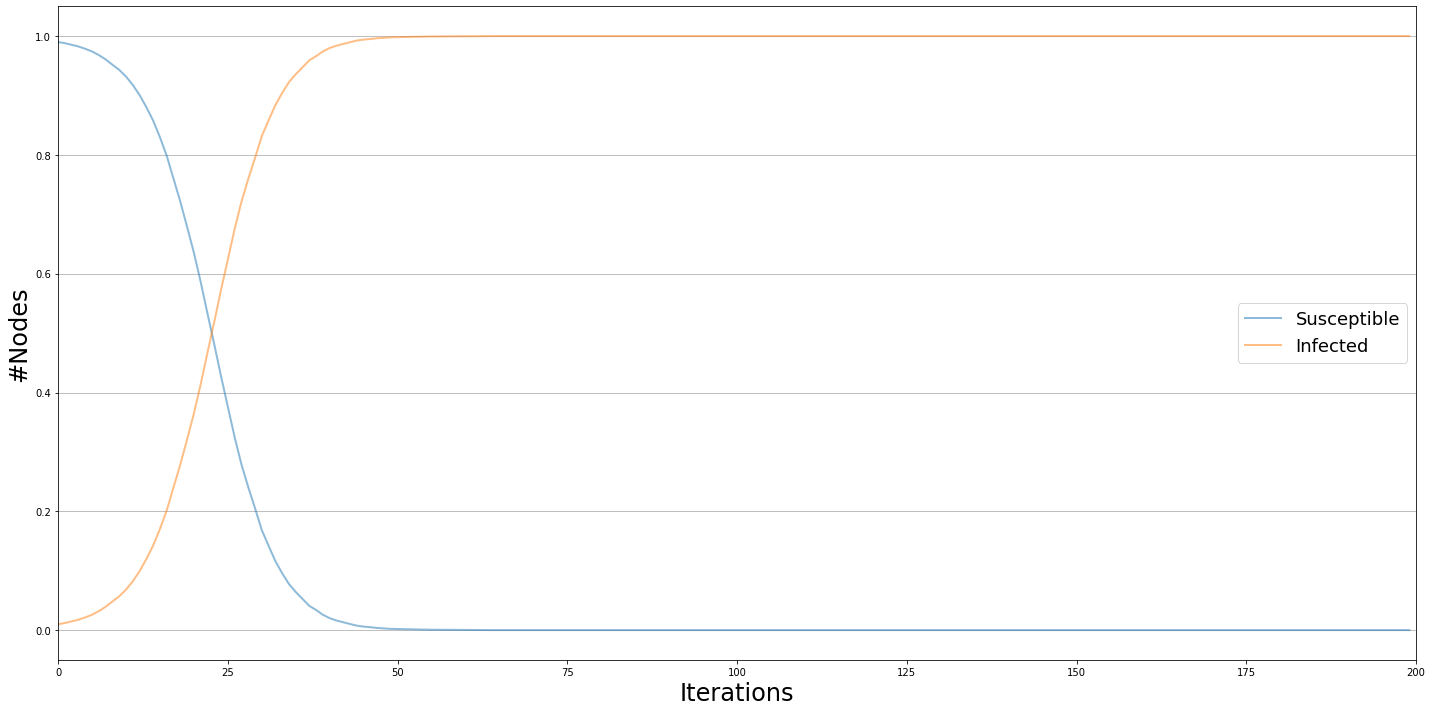

In [51]:
viz_SI.plot()

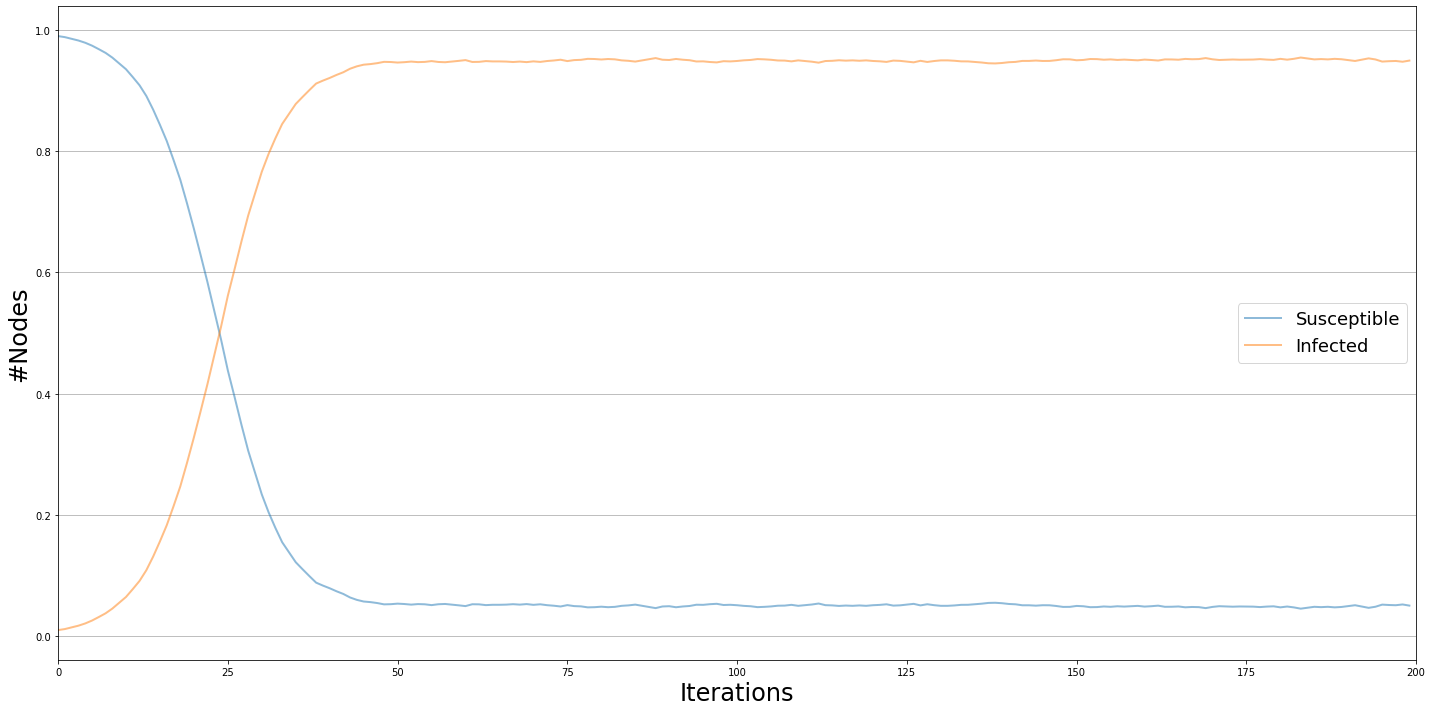

In [52]:
viz_SIS.plot()

## Analyze Model

In [53]:
trends_SIR=multi_runs(model_SIR,execution_number=10,iteration_number=200,nprocesses=4)#10=tedade namone haye analiz , 200= tedad  tekrare har ejra 4=tedad process ha ke inaro roye on 3 ta modele soal emal mikonim 

100%|██████████| 200/200 [01:32<00:00,  2.16it/s]


In [54]:
trends_SI=multi_runs(model_SI,execution_number=10,iteration_number=200,nprocesses=4)

100%|██████████| 200/200 [00:39<00:00,  5.03it/s]


In [55]:
trends_SIS=multi_runs(model_SIS,execution_number=10,iteration_number=200,nprocesses=4)

100%|██████████| 200/200 [00:50<00:00,  3.94it/s]


In [56]:
viz_SIR=DiffusionTrend(model_SIR,trends_SIR)

In [57]:
viz_SI=DiffusionTrend(model_SI,trends_SI)

In [58]:
viz_SIS=DiffusionTrend(model_SIS,trends_SIS)

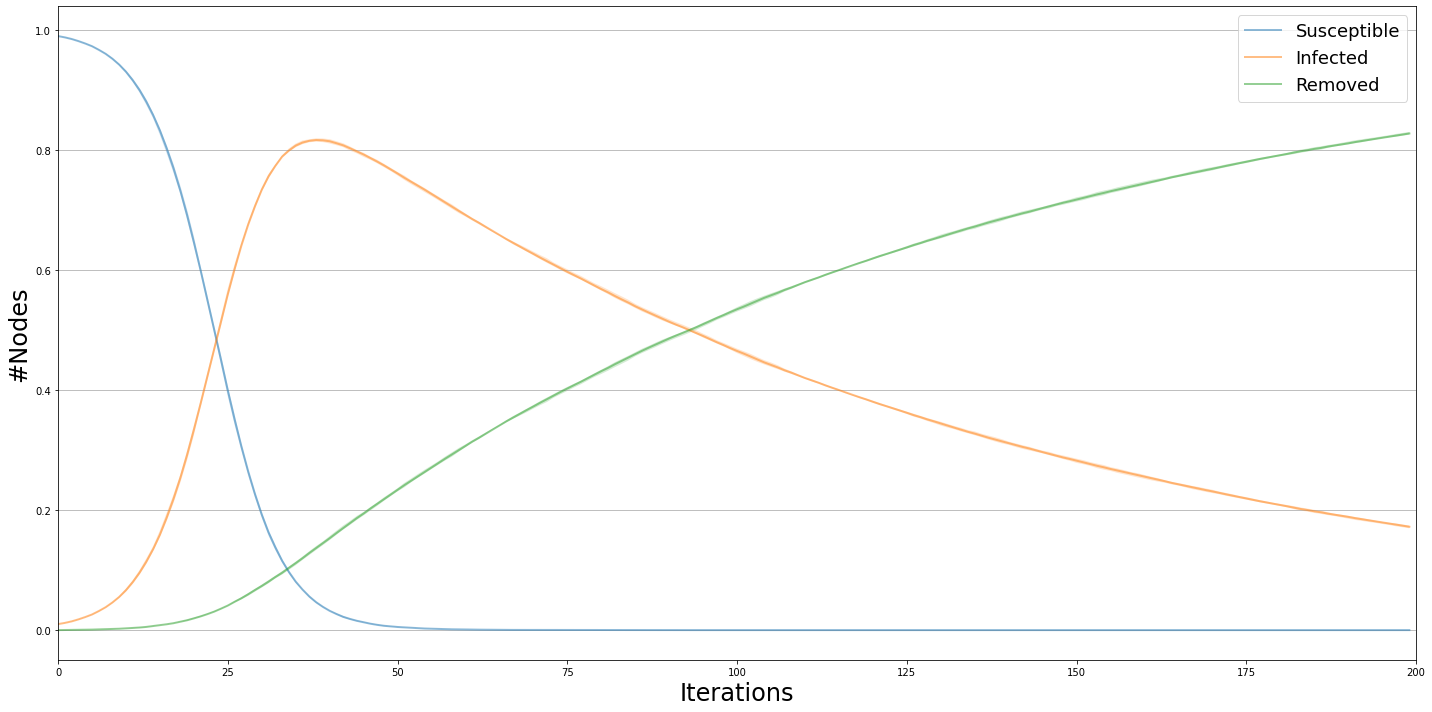

In [59]:
viz_SIR.plot(percentile=75)#75 haleye dore nemodare 

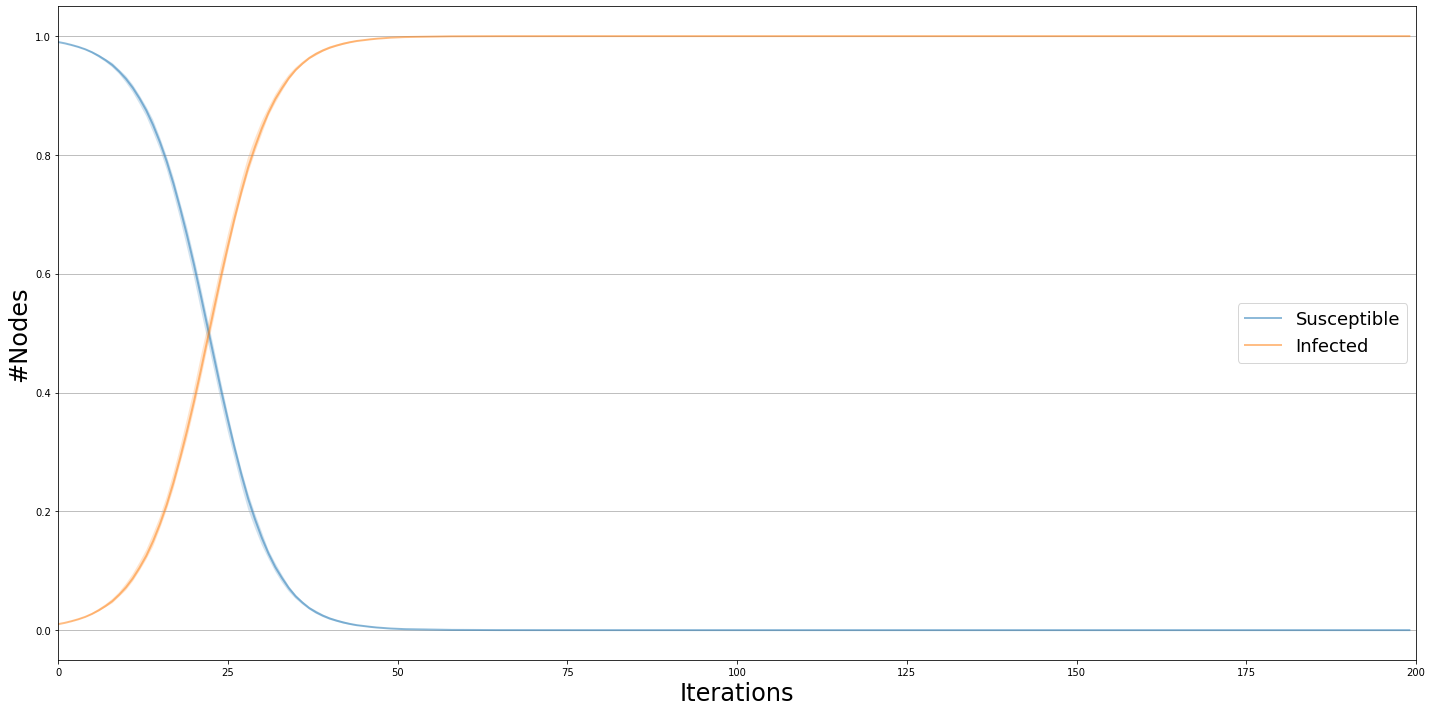

In [60]:
viz_SI.plot(percentile=75)

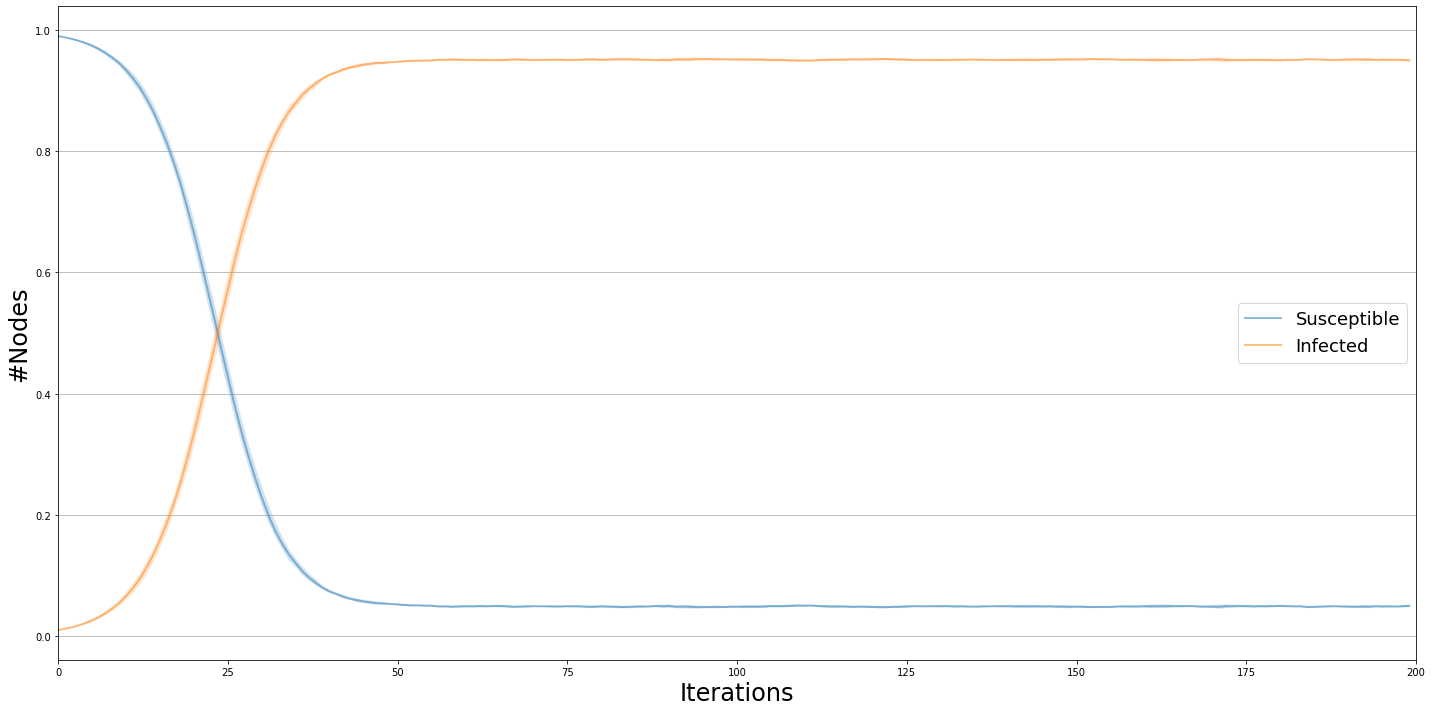

In [61]:
viz_SIS.plot(percentile=85)

## Comparing the Infection trends of different models

In [62]:
viz=DiffusionTrendComparison([model_SIR,model_SI,model_SIS],[trends_SIR,trends_SI,trends_SIS])#

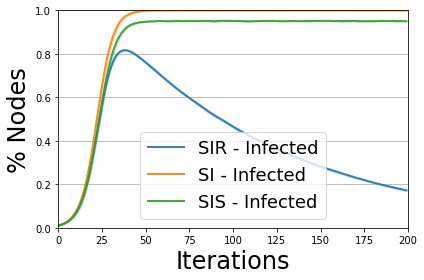

In [63]:
viz.plot()